## Exploration et analyse des notes et interactions recettes

Cette étude explore la popularité des recettes du jeu de données public Kaggle `Food.com recipes and user interactions` (`https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions`). Nous cherchons à caractériser ce qui rend une recette « populaire » au sens des notes reçues et de l'activité des utilisateurs.

### Objectif
Comprendre les caractéristiques des recettes populaires (notes moyennes élevées, nombre d'évaluations, etc.) et évaluer le rôle du rating dans l'indice de popularité



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")


In [2]:
# Import the data
recipes = pd.read_csv("../data/RAW_recipes.csv")
interactions = pd.read_csv("../data/RAW_interactions.csv")

In [3]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event',...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piec...","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-frien...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and m...",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', '...",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. ...,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"['place potatoes in a large pot of lightly salted water and bring to a gentle boil', 'cook until potatoes are just tender', 'drain', 'place potatoes in a large bowl and add all ingredients except ...","this is a super easy, great tasting, make ahead side dish that looks like you spent a lot more time preparing than you actually do. plus, most everything is done in advance. the times do not refle...","['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'ho...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['mix all ingredients& boil for 2 1 / 2 hours , or until thick', 'pour into jars', ""i use'old' glass ketchup bottles"", ""it is not necessary for these to'seal"", ""'my amish mother-in-law has been ma...","my dh's amish mother raised him on this recipe

In [4]:
interactions.head(20)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 ..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo.
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I followed this procedure with strawberries instead of raspberries. Perhaps this is the reason it did not work well. Sorry to report that the strawberri..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would start out with 1/3 or 1/4 cup of sugar and jsut add on from there. Just 2 cups was way too much and I had to go back to the grocery store to buy more ra...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [5]:
# Préparation et exploration préliminaire

# Dimensions des jeux
recipes_shape = recipes.shape
interactions_shape = interactions.shape
print({
    'recipes_shape': recipes_shape,
    'interactions_shape': interactions_shape
})

# Comptage des notes observées (incluant 0)
rating_counts = interactions['rating'].value_counts(dropna=False).sort_index()
display(rating_counts)



{'recipes_shape': (231637, 12), 'interactions_shape': (1132367, 5)}


rating
0     60847
1     12818
2     14123
3     40855
4    187360
5    816364
Name: count, dtype: int64

Les dimensions sont confortables: beaucoup de recettes et plus d'1M d'interactions. Le comptage des notes montre un pic à 5 et un volume non négligeable de 0 (souvent des commentaires sans note). On a donc de la matière pour des estimations stables et des visuels lisibles.


## Analyse univariée de la feature "rating"
Petit rappel: on regardera toujours les distributions avec et sans les zéros pour ne pas mélanger "absence de note" et "qualité" perçue.

### 1. Exploration préliminaire

On observe une majorité de notes élevées (4 et 5). En retirant les 0, la distribution se resserre encore vers 5. C’est classique sur des plateformes: les très satisfaits notent le plus.


In [6]:
# Statistiques des notes (avec et sans zéros)
ratings_all = interactions['rating'].dropna()
ratings_pos = ratings_all[ratings_all > 0]

summary_all = ratings_all.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
summary_pos = ratings_pos.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

print('Taille (toutes notes):', ratings_all.shape[0])
print('Taille (notes > 0):', ratings_pos.shape[0])
print('\nStatistiques - toutes notes:')
display(summary_all)
print('\nStatistiques - notes > 0:')
display(summary_pos)

# Agréger au niveau recette pour l'analyse suivante
agg = (interactions
       .assign(has_rating=lambda d: d['rating'] > 0)
       .groupby('recipe_id')
       .agg(
           n_interactions=('user_id', 'count'),
           n_rated=('has_rating', 'sum'),
           mean_rating=('rating', lambda s: s[s > 0].mean()),
           median_rating=('rating', lambda s: s[s > 0].median()),
       )
       .reset_index()
      )
agg['share_rated'] = np.where(agg['n_interactions'] > 0, agg['n_rated'] / agg['n_interactions'], np.nan)

display(agg.head())


Taille (toutes notes): 1132367
Taille (notes > 0): 1071520

Statistiques - toutes notes:


count    1.132367e+06
mean     4.411016e+00
std      1.264752e+00
min      0.000000e+00
10%      3.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
90%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


Statistiques - notes > 0:


count    1.071520e+06
mean     4.661499e+00
std      7.230534e-01
min      1.000000e+00
10%      4.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
90%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

,recipe_id,n_interactions,n_rated,mean_rating,median_rating,share_rated
0,38,4,4,4.250000,4.0,1.0
1,39,1,1,3.000000,3.0,1.0
2,40,9,9,4.333333,5.0,1.0
3,41,2,2,4.500000,4.5,1.0
4,43,1,1,1.000000,1.0,1.0


In [7]:
# Export 1: agrégation basique par recette (agg)
output_dir = "csv_rating/"
agg.to_csv(f"{output_dir}/recipes_agg_basic.csv", index=False)
print("Exporté: recipes_agg_basic.csv")


Exporté: recipes_agg_basic.csv


### 2. Visualisations: distributions et relation volume-note

* Histogramme et boxplot des notes (avec et sans zéros)
* Dispersion de la relation entre "n_rated" et "mean_rating"


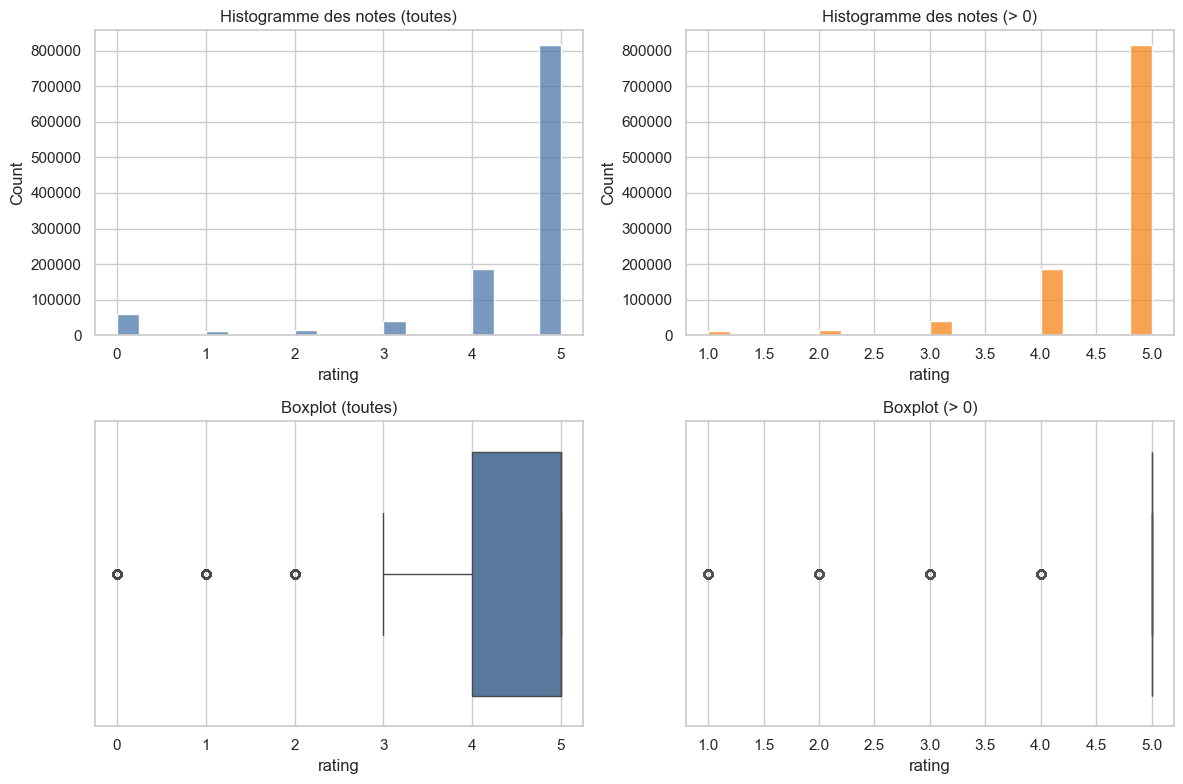

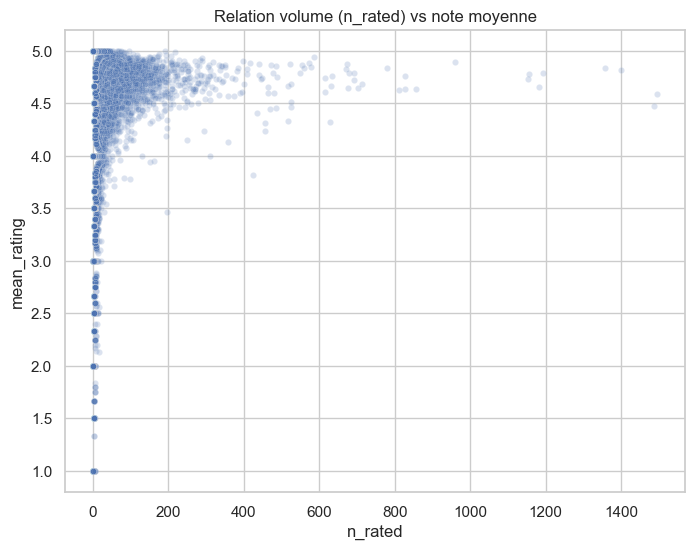

<Figure size 640x480 with 0 Axes>

In [8]:
# Histogrammes et boxplots des notes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogramme toutes notes
sns.histplot(ratings_all, bins=20, kde=False, ax=axes[0, 0], color='#4C78A8')
axes[0, 0].set_title('Histogramme des notes (toutes)')
axes[0, 0].set_xlabel('rating')

# Histogramme notes > 0
sns.histplot(ratings_pos, bins=20, kde=False, ax=axes[0, 1], color='#F58518')
axes[0, 1].set_title('Histogramme des notes (> 0)')
axes[0, 1].set_xlabel('rating')

# Boxplot toutes notes
sns.boxplot(x=ratings_all, ax=axes[1, 0], color='#4C78A8')
axes[1, 0].set_title('Boxplot (toutes)')
axes[1, 0].set_xlabel('rating')

# Boxplot notes > 0
sns.boxplot(x=ratings_pos, ax=axes[1, 1], color='#F58518')
axes[1,  1].set_title('Boxplot (> 0)')
axes[1, 1].set_xlabel('rating')

plt.tight_layout()
plt.savefig("visualisation_distributions.png")
plt.show()

# Scatter n_rated vs mean_rating (avec transparence)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=agg, x='n_rated', y='mean_rating', alpha=0.2, s=20)
ax.set_title('Relation volume (n_rated) vs note moyenne')
plt.savefig("visualisation_relation_volume_note.png")
plt.show()

plt.tight_layout()
plt.show()


Les histogrammes confirment le biais positif (pic à 5). Les boxplots montrent une médiane élevée et peu de dispersion côté bas une fois les zéros exclus. Le nuage n_rated vs moyenne suggère qu’avec plus d’avis, la moyenne se stabilise vers ~4.6-4.8.

### 3. Lissage bayésien (additive smoothing)
Idée simple: on "tire" la moyenne des recettes peu notées vers la moyenne globale. Cela évite de sur-classer une recette avec 1 seul 5/5.

Pourquoi exclure les ratings = 0 ?
Dans ce dataset, 0 reflète le plus souvent une interaction sans note (commentaire sans évaluation). Les intégrer biaiserait la distribution et sous‑estimerait la qualité. Conserver 0 pour des métriques d’engagement (n_interactions), mais l’exclure pour les statistiques de qualité (moyenne, proportion) est plus fidèle à l’intention utilisateur.

Une autre idée serait de faire une imputation par une valeur "a priori probable" comme la note moyenne globale ou une distribution bayésienne à priori. Et ça, on en est pas sûr

Plusieurs études montrent que les utilisateurs très satisfaits ou très insatisfaits laissent plus facilement une note et que les utilisateurs modérément satisfaits ou passifs notent moins souvent.

Donc, l'absence de note n'est forcément pas un hasard. Imputer une valeur moyenne peut "écraser" la variance ou biaiser les statistiques

On évitera donc d'imputer arbitrairement les zéros; pour stabiliser les moyennes par recette avec peu d'avis, on applique un lissage bayésien (additive smoothing) uniquement sur les notes réelles (rating > 0)

Formule (avec a priori sur la moyenne globale):

Score bayésien = ($\sum ratings + \alpha \mu ) / (n + \alpha)$

- $\mu$: moyenne globale des notes réelles (rating > 0)
- n: nombre d'évaluations réelles pour l'item
- $\alpha$: poids de l'a priori (par défaut 5; à ajuster)

Remarque: Cette approche explicite l'hypothèse que, en absence d'information suffisante, la moyenne d'un item se rapproche de la moyenne globale, sans forcer une imputation de 0


In [9]:
# Lissage bayésien en tenant compte des 0 correctement
# - Pas d'imputation des zéros comme vraies notes; ils restent des absences
# - La moyenne bayésienne se fait sur les notes réelles (>0), mais la pénalisation
#   vient naturellement des faibles n_rated (les zéros augmentent n_interactions
#   mais pas n_rated)

# Copie locale pour éviter les effets de bord
interactions = interactions.copy()

# 1) Statistiques globales sur les notes réelles (>0)
ratings_real = interactions.loc[interactions['rating'] > 0, 'rating']
mu_global = ratings_real.mean()
alpha = 5  # hyperparamètre à ajuster si besoin

# 2) Agrégations par recette: compte notés et somme des notes réelles
agg_bayes = (
    interactions.assign(rating_real=lambda d: d['rating'].where(d['rating'] > 0, np.nan))
    .groupby('recipe_id')
    .agg(
        n_interactions=('user_id', 'count'),                # inclut zéros
        n_rated=('rating', lambda s: (s > 0).sum()),        # exclut zéros
        sum_rating_real=('rating_real', 'sum'),
    )
    .reset_index()
)

# 3) Score bayésien (lisse la moyenne des notes réelles)
agg_bayes['bayes_mean'] = (
    (agg_bayes['sum_rating_real'].fillna(0.0) + alpha * mu_global)
    / (agg_bayes['n_rated'].clip(lower=0) + alpha)
)

# 4) Merge avec la table agrégée existante `agg` (si déjà créée plus haut)
try:
    agg = agg.merge(
        agg_bayes[['recipe_id', 'bayes_mean']],
        on='recipe_id', how='left'
    )
except NameError:
    # Si `agg` n'existe pas encore, on ne force pas sa création ici
    pass

# 5) Affichage de contrôle
print({'mu_global': float(mu_global), 'alpha': alpha, 'rows': int(agg.shape[0])})
display(agg.head(20))


{'mu_global': 4.66149861878453, 'alpha': 5, 'rows': 231637}


,recipe_id,n_interactions,n_rated,mean_rating,median_rating,share_rated,bayes_mean
0,38,4,4,4.250000,4.0,1.000000,4.478610
1,39,1,1,3.000000,3.0,1.000000,4.384582
2,40,9,9,4.333333,5.0,1.000000,4.450535
3,41,2,2,4.500000,4.5,1.000000,4.615356
4,43,1,1,1.000000,1.0,1.000000,4.051249
5,45,3,2,4.000000,4.0,0.666667,4.472499
6,46,2,2,5.000000,5.0,1.000000,4.758213
7,48,2,1,2.000000,2.0,0.500000,4.217916
8,49,20,18,4.833333,5.0,0.900000,4.795978
9,50,2,2,4.500000,4.5,1.000000,4.615356


En pratique, le score bayésien reste proche de la moyenne réelle quand il y a beaucoup d’avis, et se rapproche de la moyenne globale quand le volume est faible. Les zéros ne sont pas imputés comme des notes, mais ils n’augmentent pas "n_rated", ce qui limite l’influence des recettes très peu notées.


In [10]:
# Export 2: enrichissements bayésiens
# - interactions enrichies avec note_absente
# - agrégations par recette avec bayes_mean et absence

output_dir = "csv_rating/"

# Agrégations recette enrichies
agg_export_cols = [
    'recipe_id', 'n_interactions', 'n_rated', 'mean_rating', 'median_rating',
    'share_rated', 'bayes_mean'
]
cols_present_agg = [c for c in agg_export_cols if c in agg.columns]
agg[cols_present_agg].to_csv(f"{output_dir}/recipes_agg_bayes.csv", index=False)
print("Exporté: recipes_agg_bayes.csv")


Exporté: recipes_agg_bayes.csv


### 4. Estimation de proportion 

Quand on fait un sondage ou une expérience, on peut être amené à estimer une proportion p (par exemple : la proportion de personnes satisfaites, la proportion de succès, etc.).

Le problème est que l'estimateur classique, c’est-à-dire la proportion observée, est une estimation ponctuelle : elle ne donne aucune idée de l'incertitude autour de cette valeur.

On utilise donc un intervalle de confiance, qui donne une plage dans laquelle la vraie proportion p a de fortes chances de se trouver

On utilisera soit :
* L'intervalle classique de Wald qui est peu fiable pour les petits échantillons ou les proportions proches de 0 ou 1.
* L'intervalle de Wilson qui est plus précis et plus symétrique même pour des petits échantillons.

Note : L'intervalle de score de Wilson est une méthode statistique pour calculer un intervalle de confiance pour une proportion dans une population statistique. Cette méthode est particulièrement utile pour les données binaires, telles que les réponses succès/échec ou oui/non, et offre une estimation plus précise que la méthode traditionnelle d'approximation normale, surtout pour les petites tailles d'échantillon ou les proportions proches de 0 ou 1 Elle est fondée sur la distribution binomiale et intègre le nombre de réussites et d'échecs dans un échantillon pour calculer l'intervalle de confiance

In [11]:
# Fonctions utilitaires: intervalles de confiance pour proportions (Wald et Wilson)
import numpy as np
from math import sqrt, erf

# Niveau de confiance par défaut 95%
def z_from_confidence(conf_level: float = 0.95) -> float:
    # Valeurs usuelles (approximations suffisantes ici)
    if abs(conf_level - 0.90) < 1e-9:
        return 1.6448536269514722
    if abs(conf_level - 0.95) < 1e-9:
        return 1.959963984540054
    if abs(conf_level - 0.99) < 1e-9:
        return 2.5758293035489004
    return 1.959963984540054


def ci_wald(successes: np.ndarray, n: np.ndarray, conf_level: float = 0.95):
    """
    Intervalle de Wald pour une proportion p.
    - Peu fiable pour petits n ou p proche de 0/1.
    - Retourne (p_hat, lower, upper)
    """
    successes = successes.astype(float)
    n = n.astype(float)
    p = np.divide(successes, n, out=np.zeros_like(n), where=n>0)
    z = z_from_confidence(conf_level)
    se = np.sqrt(np.divide(p * (1 - p), n, out=np.zeros_like(n), where=n>0))
    lower = np.clip(p - z * se, 0.0, 1.0)
    upper = np.clip(p + z * se, 0.0, 1.0)
    lower[n == 0] = 0.0
    upper[n == 0] = 0.0
    return p, lower, upper


def ci_wilson(successes: np.ndarray, n: np.ndarray, conf_level: float = 0.95):
    """
    Intervalle de Wilson (score) pour une proportion p.
    - Plus robuste pour petits échantillons et p près de 0/1
    - Retourne (p_hat, lower, upper)
    """
    successes = successes.astype(float)
    n = n.astype(float)
    p = np.divide(successes, n, out=np.zeros_like(n), where=n>0)
    z = z_from_confidence(conf_level)
    denom = 1 + (z**2) / n
    center = p + (z**2) / (2 * n)
    adj = z * np.sqrt(np.divide(p*(1-p) + (z**2)/(4*n), n, out=np.zeros_like(n), where=n>0))
    lower = (center - adj) / denom
    upper = (center + adj) / denom
    lower[n == 0] = 0.0
    upper[n == 0] = 0.0
    return p, np.clip(lower, 0.0, 1.0), np.clip(upper, 0.0, 1.0)


def normal_cdf(x: float) -> float:
    # CDF Normale standard via erf
    return 0.5 * (1.0 + erf(x / np.sqrt(2)))


def two_prop_ztest(x1: int, n1: int, x2: int, n2: int, alternative: str = 'two-sided', conf_level: float = 0.95):
    """
    Test z de comparaison de deux proportions (pooled) et IC pour la différence p1 - p2.
    - alternative: 'two-sided', 'larger' (p1>p2), 'smaller' (p1<p2)
    - Retourne dict avec p1, p2, diff, z, pvalue, (ci_low, ci_high)
    """
    x1, n1, x2, n2 = float(x1), float(n1), float(x2), float(n2)
    p1 = x1 / n1 if n1 > 0 else 0.0
    p2 = x2 / n2 if n2 > 0 else 0.0
    p_pool = (x1 + x2) / (n1 + n2) if (n1 + n2) > 0 else 0.0
    se_pool = np.sqrt(p_pool * (1 - p_pool) * ((1.0 / n1) + (1.0 / n2))) if (n1>0 and n2>0) else np.inf
    z = (p1 - p2) / se_pool if se_pool > 0 else 0.0
    if alternative == 'two-sided':
        pval = 2 * (1 - normal_cdf(abs(z)))
    elif alternative == 'larger':
        pval = 1 - normal_cdf(z)
    else:
        pval = normal_cdf(z)
    zcrit = z_from_confidence(conf_level)
    # IC non-pooled pour la différence (classique)
    se_diff = np.sqrt((p1 * (1 - p1)) / n1 + (p2 * (1 - p2)) / n2) if (n1>0 and n2>0) else np.inf
    ci_low = (p1 - p2) - zcrit * se_diff if np.isfinite(se_diff) else 0.0
    ci_high = (p1 - p2) + zcrit * se_diff if np.isfinite(se_diff) else 0.0
    return {
        'p1': p1, 'p2': p2, 'diff': p1 - p2, 'z': z, 'pvalue': pval,
        'ci_low': max(-1.0, ci_low), 'ci_high': min(1.0, ci_high)
    }

print("Fonctions d'IC Wald/Wilson et comparaison de proportions prêtes.")


Fonctions d'IC Wald/Wilson et comparaison de proportions prêtes.


### Proportion de recettes ayant au moins une évaluation (rating > 0)

In [12]:
# Proportion de recettes ayant au moins une évaluation (rating > 0)
# - Estimation ponctuelle + IC de Wald et de Wilson (95%)

# Total de recettes (dimension)
recipes_dim = recipes[['id']].rename(columns={'id': 'recipe_id'}).drop_duplicates()
N_recipes = recipes_dim.shape[0]

# Compter celles qui ont au moins une note > 0
rated_counts = (
    interactions.assign(has_rating=lambda d: d['rating'] > 0)
    .groupby('recipe_id')['has_rating']
    .sum()
    .reset_index(name='n_rated')
)
recipes_with_rating = (rated_counts['n_rated'] > 0).sum()

# Proportion et IC
x = np.array([recipes_with_rating])
n = np.array([N_recipes])
phat_wald, low_wald, up_wald = ci_wald(x, n, conf_level=0.95)
phat_wil, low_wil, up_wil = ci_wilson(x, n, conf_level=0.95)

print("Nombre total de recettes:", int(N_recipes))
print("Recettes avec au moins une note:", int(recipes_with_rating))
print("Proportion observée:", float(phat_wil[0]))
print("IC 95% (Wald):   [", float(low_wald[0]), ",", float(up_wald[0]), "]")
print("IC 95% (Wilson): [", float(low_wil[0]),  ",", float(up_wil[0]),  "]")


Nombre total de recettes: 231637
Recettes avec au moins une note: 226590
Proportion observée: 0.9782115983197849
IC 95% (Wald):   [ 0.9776170690841463 , 0.9788061275554235 ]
IC 95% (Wilson): [ 0.9776090906120545 , 0.978798245006195 ]


Presque toutes les recettes ont au moins une note: la proportion dépasse les 97%. Sur un tel volume, Wilson et Wald donnent des bornes très proches.


### Proportions par classe de note (1..5) et intervalles de Wilson

Nous estimons maintenant, sur l'ensemble des évaluations réelles (rating > 0), les proportions des classes 1 à 5, avec des intervalles de Wilson à 95%. Ces proportions donnent une vision fine de la répartition des avis.

Total des évaluations réelles (N) = 1071520


,rating,count,prop,ci_low,ci_high
0,1,12818,0.011962,0.011758,0.012170
1,2,14123,0.013180,0.012966,0.013398
2,3,40855,0.038128,0.037767,0.038492
3,4,187360,0.174854,0.174136,0.175575
4,5,816364,0.761875,0.761067,0.762680


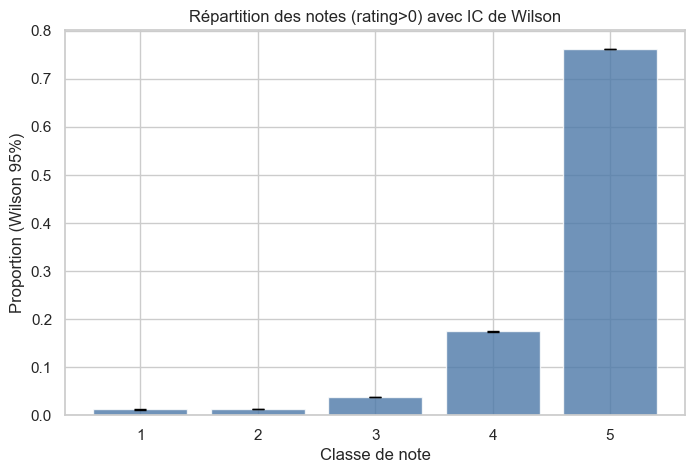

In [13]:
# Estimation des proportions par classe (1..5)
# - On se place sur toutes les évaluations > 0

ratings_pos = interactions.loc[interactions['rating'] > 0, 'rating'].astype(int)
counts = ratings_pos.value_counts().reindex([1,2,3,4,5], fill_value=0)
N = int(counts.sum())

x = counts.values.astype(float)
n = np.full_like(x, N, dtype=float)
phat_wil, low_wil, up_wil = ci_wilson(x, n, conf_level=0.95)

prop_df = (
    pd.DataFrame({
        'rating': [1,2,3,4,5],
        'count': counts.values,
        'prop': phat_wil,
        'ci_low': low_wil,
        'ci_high': up_wil,
    })
)

print(f"Total des évaluations réelles (N) = {N}")
display(prop_df)

# Visualisation simple des proportions avec barres d'erreur (Wilson)
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(prop_df['rating'], prop_df['prop'], color='#4C78A8', alpha=0.8)
ax.errorbar(prop_df['rating'], prop_df['prop'],
            yerr=[prop_df['prop']-prop_df['ci_low'], prop_df['ci_high']-prop_df['prop']],
            fmt='none', ecolor='black', capsize=4)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Classe de note')
ax.set_ylabel('Proportion (Wilson 95%)')
ax.set_title('Répartition des notes (rating>0) avec IC de Wilson')
plt.show()

La répartition est ultra concentrée sur 5 (environ 76%), puis 4 (~17%). Les notes 1 et 2 restent marginales. Les barres d’erreur (Wilson 95%) sont très fines vu le volume.


### Intervalle de confiance pour une moyenne (approximation normale)

On peut estimer un intervalle de confiance pour la moyenne par:

moyenne ± z * (écart-type / √n)

Nous illustrons sur la moyenne de `n_rated` des recettes (filtrées pour éviter les NaN).

In [14]:
# IC de moyenne pour `n_rated`
vals = agg['n_rated'].dropna().astype(float).values
n = len(vals)
mean = float(np.mean(vals))
std = float(np.std(vals, ddof=1)) if n > 1 else 0.0
z = z_from_confidence(0.95)
se = std / np.sqrt(n) if n > 0 else 0.0
ci_low = mean - z * se
ci_high = mean + z * se
print({
    'n': n,
    'mean_n_rated': mean,
    'std': std,
    'ci95_low': ci_low,
    'ci95_high': ci_high,
})

{'n': 231637, 'mean_n_rated': 4.625858563182911, 'std': 16.415246222786536, 'ci95_low': np.float64(4.559010084743997), 'ci95_high': np.float64(4.692707041621825)}


### Complément : Comparer deux proportions (ex: recette A vs B)

Nous comparons la proportion d'évaluations positives (rating ≥ 4 et >0) entre deux recettes. Nous utilisons:
- un test z de comparaison de proportions (pooled)
- un intervalle de confiance 95% pour la différence p1 - p2

Exemple ci‑dessous: on choisit deux recettes au hasard avec suffisamment d'évaluations (> 20).


In [15]:
# Sélection de deux recettes (avec au moins 20 notes réelles)
MIN_RATED = 20
agg_valid = agg[agg['n_rated'] >= MIN_RATED]

# Calcul des "positives" (rating>=4 parmi ratings>0)
agg_pos = (
    interactions.assign(pos=(interactions['rating'] >= 4) & (interactions['rating'] > 0))
    .groupby('recipe_id')
    .agg(positives=('pos', 'sum'))
    .reset_index()
)
comp_base = agg_valid[['recipe_id', 'n_rated']].merge(agg_pos, on='recipe_id', how='left').fillna({'positives':0})

# Prendre deux recettes arbitraires du haut
if comp_base.shape[0] >= 2:
    A_id, B_id = comp_base.sample(2)['recipe_id'].tolist()
else:
    A_id = B_id = None

if A_id is not None and B_id is not None and A_id != B_id:
    A = comp_base.loc[comp_base['recipe_id'] == A_id].iloc[0]
    B = comp_base.loc[comp_base['recipe_id'] == B_id].iloc[0]
    res = two_prop_ztest(int(A['positives']), int(A['n_rated']), int(B['positives']), int(B['n_rated']), alternative='two-sided', conf_level=0.95)
    names = recipes[['id','name']].rename(columns={'id':'recipe_id'})
    A_name = names.loc[names['recipe_id']==A_id, 'name'].values[0]
    B_name = names.loc[names['recipe_id']==B_id, 'name'].values[0]
    print(f"Recette A: {A_name} (id={A_id})")
    print(f"  p_A = {res['p1']:.3f}  (x={int(A['positives'])}, n={int(A['n_rated'])})")
    print(f"Recette B: {B_name} (id={B_id})")
    print(f"  p_B = {res['p2']:.3f}  (x={int(B['positives'])}, n={int(B['n_rated'])})")
    print(f"Différence p_A - p_B = {res['diff']:.3f}")
    print(f"z = {res['z']:.3f}, p-value = {res['pvalue']:.4f}")
    print(f"IC95% diff = [{res['ci_low']:.3f}, {res['ci_high']:.3f}]")
else:
    print("Échantillon insuffisant pour comparer deux recettes.") 

Recette A: jello pinwheels (id=109416)
  p_A = 0.929  (x=39, n=42)
Recette B: allrighty then scrambled eggs   paula deen (id=73033)
  p_B = 0.932  (x=123, n=132)
Différence p_A - p_B = -0.003
z = -0.072, p-value = 0.9423
IC95% diff = [-0.092, 0.086]


Comme dit plus haut, ici, on compare deux recettes au hasard: les différences observées ne sont pas statistiquement significatives (p‑value élevée, l’IC de la différence recouvre 0). C’est une démo; on pourra cibler des recettes précises dans l’app ou un cahier de tests


### Complément : Scores de popularité composites et classement global

Dans certaines applications, on ne s'intéresse pas du tout l'intervalle, mais seulement à la valeur minimale plausible pour être sûr d’un résultat.
La borne inférieure est choisie pour être sûr, avec un certain niveau de confiance (souvent 95 %), que la vraie proportion est au moins égale à cette valeur. C’est une estimation prudente et conservatrice, utile dans les contextes où le risque de surestimer est problématique.

Des notes très élevées avec peu d'évaluations ne garantissent toujours pas la "popularité". On peut pondérer par le nombre d'évaluations. Le ratio share_rated renseigne sur l'engagement (beaucoup d'interactions mais peu de notes évoquent un autre comportement).

Idée d'indicateur de popularité : une moyenne pondérée f(mean_rating, n_rated, share_rated) ou encore un score de Wilson pour ordonner avec incertitude

Nous calculerons deux scores:
- La borne inférieure de Wilson (Wilson lower bound (95%)) sur la proportion d'évaluations positives (rating ≥ 4)
- Moyenne pondérée par log(volume): combine mean_rating et n_rated via log(1 + n_rated) (On n'exclura "share_rated" pour le moment)

Nous produirons ensuite des classements globaux (top 20) et un score combiné normalisé.

Ces classements racontent la même histoire sous deux angles: fiabilité (Wilson) vs traction/volume (log‑pondéré). Le score combiné permet un compromis simple et facilement réglable.


Précision : le score de Wilson fournit une borne inférieure d’un intervalle de confiance pour une proportion (ici, part d’évaluations positives). Il pénalise naturellement les faibles volumes et réduit le risque de surclasser des recettes avec peu d’avis mais une proportion parfaite. Combiner un indicateur de fiabilité (Wilson) avec un indicateur de volume/qualité (moyenne log‑pondérée). 

La moyenne pondérée simple ignore l’incertitude; l’approche conjointe (70% Wilson, 30% log‑w par exemple) équilibre fiabilité et traction

Pour le calcul du score de popularité, nous n'utiliserons désormais que les valeurs de rating>0 et considérerons un seuil minimal (>=4 par exemple) comme positif pour la proportion.

Pourquoi un seuil « positif » à rating ≥ 4 ?
Empiriquement, les notations en ligne sont asymétriques (biais positif). Le seuil "≥ 4" isole des retours franchement favorables tout en tolérant des 4/5 fréquents. Cela évite qu’une recette très neutre (3) gonfle artificiellement la proportion « positive ».

Le seuil est ajustable: on peut tester "≥ 5" (plus strict) ou "≥ 3" (plus inclusif) selon le besoin

In [16]:
# Scores composites: Wilson et moyenne pondérée log-volume
from math import sqrt

def wilson_lower_bound(positives: np.ndarray, n: np.ndarray, z: float = 1.96) -> np.ndarray:
    n = n.astype(float)
    p = np.divide(positives, n, out=np.zeros_like(n, dtype=float), where=n>0)
    denom = 1 + z**2 / n
    center = p + z*z/(2*n)
    margin = z * np.sqrt(np.divide(p*(1-p) + z*z/(4*n), n, out=np.zeros_like(n, dtype=float), where=n>0))
    lower = (center - margin) / denom
    lower[n == 0] = 0.0
    return lower

def log_weighted_mean(mean_rating: np.ndarray, n_rated: np.ndarray) -> np.ndarray:
    return np.nan_to_num(mean_rating, nan=0.0) * np.log1p(n_rated)

def minmax(series: pd.Series) -> pd.Series:
    vmin, vmax = series.min(), series.max()
    if pd.isna(vmin) or pd.isna(vmax) or vmax == vmin:
        return pd.Series(np.zeros_like(series), index=series.index)
    return (series - vmin) / (vmax - vmin)


    

MIN_RATED = 20
recipes_min = recipes[['id', 'name']].rename(columns={'id': 'recipe_id'})
agg_named = agg.merge(recipes_min, on='recipe_id', how='left')
base = agg_named[agg_named['n_rated'] >= MIN_RATED].copy()
if 'positives' not in base.columns:
    agg_pos = (
        interactions.assign(pos=(interactions['rating'] >= 4) & (interactions['rating'] > 0))
        .groupby('recipe_id')
        .agg(positives=('pos', 'sum'))
        .reset_index()
    )
    base = base.merge(agg_pos, on='recipe_id', how='left')
    base['positives'] = base['positives'].fillna(0).astype(int)


base['wilson_lb'] = wilson_lower_bound(base['positives'].values, base['n_rated'].values, z=1.96)
base['logw_mean'] = log_weighted_mean(base['mean_rating'].values, base['n_rated'].values)
base['wilson_norm'] = minmax(base['wilson_lb'])
base['logw_norm'] = minmax(base['logw_mean'])

# combinaisons
base['score_combo_50_50'] = 0.5 * base['wilson_norm'] + 0.5 * base['logw_norm']
base['score_combo_70_30'] = 0.7 * base['wilson_norm'] + 0.3 * base['logw_norm']

# classements
rank_wilson_top20 = base.sort_values(['wilson_lb', 'n_rated'], ascending=[False, False]).head(20)
rank_logw_top20 = base.sort_values(['logw_mean', 'n_rated'], ascending=[False, False]).head(20)
rank_50_50_top20  = base.sort_values(['score_combo_50_50', 'n_rated'], ascending=[False, False]).head(20)
rank_70_30_top20  = base.sort_values(['score_combo_70_30', 'n_rated'], ascending=[False, False]).head(20)

display(rank_wilson_top20[['recipe_id','name','n_rated','mean_rating','wilson_lb']])
display(rank_logw_top20[['recipe_id','name','n_rated','mean_rating','logw_mean']])
display(rank_50_50_top20[['recipe_id','name','n_rated','mean_rating','score_combo_50_50']])
display(rank_70_30_top20[['recipe_id','name','n_rated','mean_rating','score_combo_70_30']])


,recipe_id,name,n_rated,mean_rating,wilson_lb
7329,486261,mexican stack up rsc,217,4.990783,0.982605
4626,111777,chicken pot pie with 2 crusts,193,4.958549,0.980484
7332,486496,bacon lattice tomato muffins rsc,192,5.000000,0.980384
2159,46262,uncle bill s method for cooking turkey,175,4.971429,0.978520
5011,128566,homemade chicken pot pie,156,4.923077,0.975966
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,0.975645
4487,107786,beth s melt in your mouth barbecue ribs oven,587,4.943782,0.975591
1440,30358,perfect pasta with no watching and no sweating,152,4.940789,0.975349
220,8739,wholly guacamole,290,4.903448,0.975207
6409,221743,kittencal s best blasted rapid roast whole chicken,290,4.931034,0.975207


,recipe_id,name,n_rated,mean_rating,logw_mean
65,2886,best banana bread,1401,4.819415,34.919817
1865,39087,creamy cajun chicken pasta,1359,4.838852,34.913479
3071,67256,best ever banana cake with cream cheese frosting,1194,4.793132,33.963663
1558,32204,whatever floats your boat brownies,1155,4.780087,33.712617
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,33.611454
1254,27208,to die for crock pot roast,1496,4.589572,33.555365
991,22782,jo mama s world famous spaghetti,1154,4.729636,33.352711
2526,54257,yes virginia there is a great meatloaf,1182,4.652284,32.918674
3837,89204,crock pot chicken with black beans cream cheese,1488,4.478495,32.719255
1303,28148,oven fried chicken chimichangas,779,4.838254,32.219357


,recipe_id,name,n_rated,mean_rating,score_combo_50_50
1865,39087,creamy cajun chicken pasta,1359,4.838852,0.988482
65,2886,best banana bread,1401,4.819415,0.977529
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,0.969827
3071,67256,best ever banana cake with cream cheese frosting,1194,4.793132,0.955004
1558,32204,whatever floats your boat brownies,1155,4.780087,0.941512
1303,28148,oven fried chicken chimichangas,779,4.838254,0.938979
306,10744,delicious chicken pot pie,674,4.876855,0.933576
4487,107786,beth s melt in your mouth barbecue ribs oven,587,4.943782,0.929336
991,22782,jo mama s world famous spaghetti,1154,4.729636,0.926571
1830,38298,olive garden copycat zuppa toscana,572,4.886364,0.919350


,recipe_id,name,n_rated,mean_rating,score_combo_70_30
1865,39087,creamy cajun chicken pasta,1359,4.838852,0.983973
3136,69173,kittencal s italian melt in your mouth meatballs,959,4.894682,0.978053
65,2886,best banana bread,1401,4.819415,0.968541
1303,28148,oven fried chicken chimichangas,779,4.838254,0.956461
306,10744,delicious chicken pot pie,674,4.876855,0.955846
4487,107786,beth s melt in your mouth barbecue ribs oven,587,4.943782,0.953729
3071,67256,best ever banana cake with cream cheese frosting,1194,4.793132,0.951838
1830,38298,olive garden copycat zuppa toscana,572,4.886364,0.947387
1558,32204,whatever floats your boat brownies,1155,4.780087,0.936843
2054,43509,crumb topped banana muffins,521,4.877159,0.936624


Les classements sont cohérents: comme dit plus haut, Wilson privilégie la fiabilité (proportion positive avec incertitude), tandis que la moyenne log‑pondérée favorise les recettes à fort volume. La combinaison 70/30 donne un compromis orienté qualité/fiabilité.


In [17]:
# Exports CSV des classements
output_dir = "csv_rating/"
rank_wilson_top20.to_csv(f"{output_dir}/rank_top20_wilson.csv", index=False)
rank_logw_top20.to_csv(f"{output_dir}/rank_top20_logw.csv", index=False)
rank_50_50_top20.to_csv(f"{output_dir}/rank_top20_combo_50_50.csv", index=False)
rank_70_30_top20.to_csv(f"{output_dir}/rank_top20_combo_70_30.csv", index=False)

# Exporter également la table complète avec scores
base.to_csv(f"{output_dir}/recipes_scores_all.csv", index=False)

print("Exports écrits dans data/: rank_top20_wilson.csv, rank_top20_logw.csv, rank_top20_combo_50_50.csv, rank_top20_combo_70_30.csv, recipes_scores_all.csv")


Exports écrits dans data/: rank_top20_wilson.csv, rank_top20_logw.csv, rank_top20_combo_50_50.csv, rank_top20_combo_70_30.csv, recipes_scores_all.csv


## Synthèse

- Les notes sont fortement biaisées vers le haut, surtout une fois les 0 exclus.
- Presque toutes les recettes ont au moins une évaluation; la proportion est >97% avec un IC très serré.
- Le lissage bayésien stabilise la moyenne des recettes peu notées en la rapprochant de la moyenne globale.
- Les proportions par classe confirment la dominance de la note 5, puis 4.
- La comparaison A vs B montre comment évaluer la significativité d’un écart entre deux recettes.
- Les scores de popularité combinent fiabilité (Wilson) et volume/qualité (moyenne log‑pondérée) pour un classement plus robuste.

### Exports de synthèse
1) un CSV "noyau" avec les métriques principales (sans les scores complémentaires), 
2) un CSV enrichi incluant les scores composites et classements. Nous produisons aussi les tables détaillées utilisées au fil du notebook.


In [18]:
# Cellule finale: exports consolidés (avec et sans compléments)
import os

output_dir = "csv_rating/"
os.makedirs(output_dir, exist_ok=True)

# 1) Noyau (sans compléments): features principales par recette
core_cols = [
    'recipe_id', 'n_interactions', 'n_rated', 'share_rated',
    'mean_rating', 'median_rating'
]
if 'bayes_mean' in agg.columns:
    core_cols.append('bayes_mean')

core = agg[core_cols].drop_duplicates('recipe_id')
core = core.merge(recipes[['id','name']].rename(columns={'id':'recipe_id'}), on='recipe_id', how='left')
# Colonnes ordonnées
core = core[['recipe_id','name'] + [c for c in core.columns if c not in ['recipe_id','name']]]
core_path = os.path.join(output_dir, 'recipes_feature_rating_full_core.csv')
core.to_csv(core_path, index=False)

# 2) Compléments: ajouter scores Wilson/log‑pondéré/combos si disponibles
try:
    rank_slice
except NameError:
    # Recompose minimalement à partir de base/agg
    try:
        rank_base = base.copy()
    except NameError:
        # fallback: reconstruire base si besoin
        recipes_min = recipes[['id','name']].rename(columns={'id': 'recipe_id'})
        base = agg.merge(recipes_min, on='recipe_id', how='left')
        agg_pos = (
            interactions.assign(pos=(interactions['rating'] >= 4) & (interactions['rating'] > 0))
            .groupby('recipe_id')
            .agg(positives=('pos', 'sum'))
            .reset_index()
        )
        base = base.merge(agg_pos, on='recipe_id', how='left')
        base['positives'] = base['positives'].fillna(0).astype(int)
        
    rank_slice = base.copy()
    if 'wilson_lb' not in rank_slice.columns:
        # recalculs minimums si absence
        from math import sqrt
        def wilson_lower_bound(positives: np.ndarray, n: np.ndarray, z: float = 1.96) -> np.ndarray:
            n = n.astype(float)
            p = np.divide(positives, n, out=np.zeros_like(n, dtype=float), where=n>0)
            denom = 1 + z**2 / n
            center = p + z*z/(2*n)
            margin = z * np.sqrt(np.divide(p*(1-p) + z*z/(4*n), n, out=np.zeros_like(n, dtype=float), where=n>0))
            lower = (center - margin) / denom
            lower[n == 0] = 0.0
            return lower
        def log_weighted_mean(mean_rating: np.ndarray, n_rated: np.ndarray) -> np.ndarray:
            return np.nan_to_num(mean_rating, nan=0.0) * np.log1p(n_rated)
        def minmax(series: pd.Series) -> pd.Series:
            vmin, vmax = series.min(), series.max()
            if pd.isna(vmin) or pd.isna(vmax) or vmax == vmin:
                return pd.Series(np.zeros_like(series), index=series.index)
            return (series - vmin) / (vmax - vmin)
        rank_slice['wilson_lb'] = wilson_lower_bound(rank_slice['positives'].values, rank_slice['n_rated'].values, z=1.96)
        rank_slice['logw_mean'] = log_weighted_mean(rank_slice['mean_rating'].values, rank_slice['n_rated'].values)
        rank_slice['wilson_norm'] = minmax(rank_slice['wilson_lb'])
        rank_slice['logw_norm'] = minmax(rank_slice['logw_mean'])
        rank_slice['score_combo_50_50'] = 0.5 * rank_slice['wilson_norm'] + 0.5 * rank_slice['logw_norm']
        rank_slice['score_combo_70_30'] = 0.7 * rank_slice['wilson_norm'] + 0.3 * rank_slice['logw_norm']

# Fusion enrichie
enriched_cols = ['recipe_id', 'wilson_lb', 'logw_mean', 'wilson_norm', 'logw_norm', 'score_combo_50_50', 'score_combo_70_30']
enriched_cols = [c for c in enriched_cols if c in rank_slice.columns]
full_enriched = core.merge(rank_slice[['recipe_id'] + enriched_cols].drop_duplicates('recipe_id'), on='recipe_id', how='left')
full_path = os.path.join(output_dir, 'recipes_feature_rating_full_enriched.csv')
full_enriched.to_csv(full_path, index=False)

# Exports additionnels utilisés dans le notebook (pour traçabilité)
prop_df_path = os.path.join(output_dir, 'proportions_par_classe_wilson.csv')
try:
    prop_df.to_csv(prop_df_path, index=False)
except NameError:
    pass

summary_path = os.path.join(output_dir, 'resume_proportion_recettes_notees.csv')
try:
    pd.DataFrame({
        'N_recipes': [int(N_recipes)],
        'n_with_rating': [int(recipes_with_rating)],
        'phat': [float(phat_wil[0])],
        'wilson_low': [float(low_wil[0])],
        'wilson_high': [float(up_wil[0])]
    }).to_csv(summary_path, index=False)
except Exception:
    pass

print("Exports de synthèse écrits:")
print(" -", core_path)
print(" -", full_path)
if os.path.exists(prop_df_path):
    print(" -", prop_df_path)
if os.path.exists(summary_path):
    print(" -", summary_path)



ValueError: The column label 'recipe_id' is not unique.

Les exports CSV générés dans "data/" permettront de partager les résultats et de les réutiliser (ex: app Streamlit, etc...).
